In [53]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

In [54]:
df= pd.read_csv("takehome_users.csv", encoding='latin-1')

In [55]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [56]:
df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [57]:
df['creation_time'] =  pd.to_datetime(df['creation_time'], format='%Y-%m-%d %H:%M:%S.%f')
df.rename(columns={'object_id': 'user_id'}, inplace= True)

In [58]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [59]:
df1 = pd.read_csv("takehome_user_engagement.csv")
df1.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [60]:
df1['time_stamp'] =  pd.to_datetime(df1['time_stamp'], format='%Y-%m-%d %H:%M:%S.%f')

In [61]:
df1.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [62]:
df_merge = df1.merge(df, on= "user_id", how= "left")

In [63]:
df1.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [64]:
df1['time_stamp'] = df1['time_stamp'].dt.floor('d').astype(np.int64)

In [65]:
df1.head()

,time_stamp,user_id,visited
0,1398124800000000000,1,1
1,1384473600000000000,2,1
2,1385683200000000000,2,1
3,1386547200000000000,2,1
4,1387929600000000000,2,1


In [66]:
#sorting and remove duplicated days per users 
df1 = df1.sort_values(['user_id', 'time_stamp']).drop_duplicates()

In [67]:
df1.head()

,time_stamp,user_id,visited
0,1398124800000000000,1,1
1,1384473600000000000,2,1
2,1385683200000000000,2,1
3,1386547200000000000,2,1
4,1387929600000000000,2,1


In [68]:
a = df1.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
print (b)

user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3         24.0
         4         26.0
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: time_stamp, Length: 207917, dtype: float64


In [69]:
c = b[b == 7].index.get_level_values('user_id').tolist()
print (c)

[2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 33, 33, 33, 42, 42, 42, 42, 42, 42, 50, 50, 60, 63, 63, 63, 63, 63, 63, 63, 69, 69, 69, 69, 69, 69, 74, 74, 74, 74, 74, 74, 81, 81, 82, 82, 82, 82, 82, 82, 87, 87, 87, 87, 87, 87, 87, 87, 133, 133, 135, 135, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 153, 153, 153, 153, 153, 153, 160, 160, 160, 160, 160, 160, 160, 160, 165, 168, 168, 168, 168, 168, 168, 168, 168, 185, 185, 185, 188, 188, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 200, 200, 200, 200, 202, 202, 203, 203, 203, 209, 209, 209, 209, 209, 209, 214, 214, 214, 214, 214, 230, 230, 230, 230, 245, 245, 247, 247, 247, 247, 247, 247, 247, 263, 263, 263, 265, 275, 275, 280, 280, 297, 298, 298, 298, 298, 298, 305, 310, 310, 310, 311, 311, 311, 311, 311, 322, 322, 322, 322, 322, 322, 322, 322, 322, 341, 341, 341, 341, 341, 341, 345, 351, 351, 362, 363, 363, 363, 363, 363, 363, 363, 370, 401, 401, 401, 418, 418, 418, 430, 430, 430, 430, 430, 

In [70]:
df2 = pd.DataFrame(data=c)

In [71]:
df2.rename(columns={0: "user_id"}, inplace= True)

In [72]:
df2.head()

,user_id
0,2
1,10
2,10
3,10
4,10


In [73]:
df2.drop_duplicates(inplace= True)

In [74]:
df2['future_user'] = True

In [75]:
df2.head()

,user_id,future_user
0,2,True
1,10,True
13,33,True
16,42,True
22,50,True


In [76]:
df2_merge = df.merge(df2, on= 'user_id', how= 'left')

In [77]:
df2_merge.head(50)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,future_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,NaN
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True


In [78]:
#map_yn = {'NaN': 0, 'True': 1}
#df2_merge.future_user = df2_merge.future_user.replace(NaN: 0)
df2_merge['future_user'] = df2_merge['future_user'].fillna(0)
df2_merge['future_user'] = df2_merge['future_user'].astype(int)

In [79]:
df2_merge.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,future_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [80]:
df2_merge.drop(['name', 'email'], axis=1, inplace= True)

In [81]:
df2_merge.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,future_user
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [82]:
y= df2_merge[['future_user']]

In [83]:
df2_merge.corr()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,future_user
user_id,1.000000,0.015238,-0.032370,-0.022040,0.004110,0.018699,0.006724
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.011874,0.391261
opted_in_to_mailing_list,-0.032370,0.006590,1.000000,0.483529,0.003432,0.004699,0.010443
enabled_for_marketing_drip,-0.022040,0.008035,0.483529,1.000000,0.009275,0.003687,0.006056
org_id,0.004110,0.042203,0.003432,0.009275,1.000000,-0.057780,0.061165
invited_by_user_id,0.018699,0.011874,0.004699,0.003687,-0.057780,1.000000,0.003059
future_user,0.006724,0.391261,0.010443,0.006056,0.061165,0.003059,1.000000


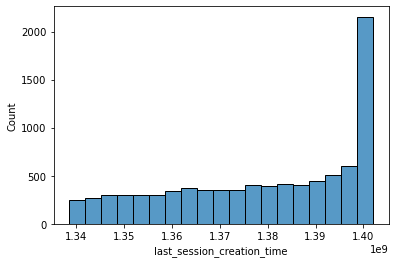

In [84]:
sns.histplot(x=df2_merge.last_session_creation_time, data=df2_merge)
plt.show()

In [85]:
df2_merge.isna().sum()

user_id                          0
creation_time                    0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
future_user                      0
dtype: int64

In [86]:
df2_merge['last_session_creation_time'] = df2_merge['last_session_creation_time'].fillna(df2_merge['last_session_creation_time'].mean())

In [87]:
df2_merge.isna().sum()

user_id                          0
creation_time                    0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
future_user                      0
dtype: int64

In [88]:
df2_merge['invited_by_user_id'] = df2_merge['invited_by_user_id'].fillna(0)

In [89]:
df2_merge.isna().sum()

user_id                       0
creation_time                 0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
future_user                   0
dtype: int64

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df2_merge[['last_session_creation_time']])
df2_merge['normalized_last_session_creation_time'] = scaler.transform(df2_merge[['last_session_creation_time']])
df2_merge.drop(columns= 'last_session_creation_time', inplace= True)

In [91]:
df2_merge.head()

,user_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,future_user,normalized_last_session_creation_time
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0,0.938254
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1,0.908366
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0,0.397434
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0,0.483504
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0,0.320639


In [92]:
df2_merge.dtypes

user_id                                           int64
creation_time                            datetime64[ns]
creation_source                                  object
opted_in_to_mailing_list                          int64
enabled_for_marketing_drip                        int64
org_id                                            int64
invited_by_user_id                              float64
future_user                                       int32
normalized_last_session_creation_time           float64
dtype: object

In [93]:
df2_merge.astype({'invited_by_user_id': 'object'}).dtypes
df2_merge.astype({'org_id': 'object'}).dtypes

user_id                                           int64
creation_time                            datetime64[ns]
creation_source                                  object
opted_in_to_mailing_list                          int64
enabled_for_marketing_drip                        int64
org_id                                           object
invited_by_user_id                              float64
future_user                                       int32
normalized_last_session_creation_time           float64
dtype: object

In [94]:
df2_merge = pd.get_dummies(df2_merge)

In [95]:
df2_merge.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,future_user,normalized_last_session_creation_time,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1,0,11,10803.0,0,0.938254,1,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,1,316.0,1,0.908366,0,1,0,0,0
2,3,2013-03-19 23:14:52,0,0,94,1525.0,0,0.397434,0,1,0,0,0
3,4,2013-05-21 08:09:28,0,0,1,5151.0,0,0.483504,1,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,193,5240.0,0,0.320639,1,0,0,0,0


In [96]:
df2_merge = pd.get_dummies(df2_merge, columns=['org_id'])

In [97]:
df2_merge.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,future_user,normalized_last_session_creation_time,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,2014-04-22 03:53:30,1,0,10803.0,0,0.938254,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,316.0,1,0.908366,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-19 23:14:52,0,0,1525.0,0,0.397434,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-05-21 08:09:28,0,0,5151.0,0,0.483504,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,5240.0,0,0.320639,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df2_merge = pd.get_dummies(df2_merge, columns=['invited_by_user_id'])

In [99]:
df2_merge.head()

,user_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,future_user,normalized_last_session_creation_time,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,invited_by_user_id_11966.0,invited_by_user_id_11972.0,invited_by_user_id_11973.0,invited_by_user_id_11974.0,invited_by_user_id_11978.0,invited_by_user_id_11981.0,invited_by_user_id_11986.0,invited_by_user_id_11994.0,invited_by_user_id_11997.0,invited_by_user_id_11999.0
0,1,2014-04-22 03:53:30,1,0,0,0.938254,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,1,0.908366,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-19 23:14:52,0,0,0,0.397434,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-05-21 08:09:28,0,0,0,0.483504,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,0,0.320639,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df2_merge.drop(['future_user', 'creation_time'], axis=1, inplace= True)

In [101]:
#Build a random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df2_merge, y, test_size = 0.3, random_state = 42)

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1, max_depth= 50)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

<ipython-input-101-c41d9890549b>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res = clf.fit(X_train, y_train)


Random Forest: Accuracy=0.891
Random Forest: f1-score=0.846
Confusion matrix
[[3191    3]
 [ 388   18]]


In [102]:
#Logistic regression

model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)
mod_predict= model.predict(X_test)
print(accuracy_score(mod_predict, y_test))

C:\Users\rsaha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.89


In [104]:
#Using grid search and fine tune parameters in logistic regression
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.1, 1, 10, 100]}
logreg = LogisticRegression (max_iter=1000)
cv = GridSearchCV(logreg, param_grid = parameters, cv= 5)
cv.fit(X_train, y_train)
y_predict = cv.predict(X_test)
score= accuracy_score(y_test, y_predict)
print(cv.best_params_, score)

C:\Users\rsaha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rsaha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rsaha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rsaha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

{'C': 100} 0.8922222222222222


In [103]:
#Hyperparameter tuning in Random forest classifier
#First use Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 300, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [105]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\rsaha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [107]:
clf_hyp = RandomForestClassifier(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 10,
 bootstrap= True, random_state= 42)

model_res1 = clf_hyp.fit(X_train, y_train)
y_pred = model_res1.predict(X_test)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print("Confusion matrix")
print(cm)

<ipython-input-107-421e7969bef2>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res1 = clf_hyp.fit(X_train, y_train)


Random Forest: Accuracy=0.887
Random Forest: f1-score=0.834
Confusion matrix
[[3194    0]
 [ 406    0]]


### SEEMS LOGISTIC REGRESSION GAVE THE BEST ACCURACY of 0.892